# Compare catalog and original implementation of Websky radio sources
> `rg2` and `rg3` compared to `rg1`

In [1]:
import os

# for jupyter.nersc.gov otherwise the notebook only uses 2 cores

os.environ["OMP_NUM_THREADS"] = "128"

In [2]:
import numpy as np
import healpy as hp
import pysm3
from pysm3 import units as u
from pysm3.models import PointSourceCatalog
import matplotlib.pyplot as plt
import xarray as xr
import h5py
import gc
import sys

In [3]:
pysm3.set_verbosity()

In [4]:
nside = 2048

In [5]:
fwhm = {8192: 0.9 * u.arcmin, 4096: 2.6 * u.arcmin, 2048: 5.1 * u.arcmin}                                                                                                                 

In [6]:
freq = [80, 100] * u.GHz

In [7]:
background = pysm3.Sky(nside=nside, preset_strings=["rg3"]).get_emission(freq)

2024-10-15 09:12:01,427 - pysm3 - INFO - Frequencies considered: [ 70. 100.]
2024-10-15 09:12:01,504 - pysm3 - INFO - Reading map websky/0.4/radio_catalog/{nside}/070.0.fits
2024-10-15 09:12:01,504 - pysm3 - INFO - Access data from /global/cfs/cdirs/cmb/www/pysm-data/websky/0.4/radio_catalog/2048/070.0.fits
2024-10-15 09:12:04,597 - pysm3 - INFO - Mean emission at 70.0 GHz in I: 0.9802 uK_RJ
2024-10-15 09:12:04,612 - pysm3 - INFO - Mean emission at 70.0 GHz in Q: 0.01168 uK_RJ
2024-10-15 09:12:04,626 - pysm3 - INFO - Mean emission at 70.0 GHz in U: 0.01168 uK_RJ
2024-10-15 09:12:04,744 - pysm3 - INFO - Reading map websky/0.4/radio_catalog/{nside}/100.0.fits
2024-10-15 09:12:04,745 - pysm3 - INFO - Access data from /global/cfs/cdirs/cmb/www/pysm-data/websky/0.4/radio_catalog/2048/100.0.fits
2024-10-15 09:12:07,162 - pysm3 - INFO - Mean emission at 100.0 GHz in I: 0.3938 uK_RJ
2024-10-15 09:12:07,175 - pysm3 - INFO - Mean emission at 100.0 GHz in Q: 0.004416 uK_RJ
2024-10-15 09:12:07,187

In [8]:
sky = pysm3.Sky(nside=nside, preset_strings=["rg2"])

2024-10-15 09:12:14,594 - pysm3 - INFO - Access data from /global/cfs/cdirs/cmb/www/pysm-data/websky/0.4/radio_catalog/websky_high_flux_catalog_1mJy.h5


In [9]:
%%time

bright = sky.get_emission(
    freq,
    fwhm=fwhm[nside],
    return_car=False,
)

2024-10-15 09:12:14,614 - pysm3 - INFO - HEALPix map resolution: 1.717743205908703 arcmin
2024-10-15 09:12:14,615 - pysm3 - INFO - CAR map resolution: 0.8588716029543515 arcmin
2024-10-15 09:12:14,616 - pysm3 - INFO - Rounded CAR map resolution: 0.8588469184890656 arcmin
2024-10-15 09:12:18,017 - pysm3 - INFO - CAR map shape (3, 12575, 25150)
2024-10-15 09:12:31,031 - pysm3 - INFO - Reprojecting to HEALPix
2024-10-15 09:12:39,522 - pysm3 - INFO - Catalog emission computed


CPU times: user 4min 10s, sys: 18.7 s, total: 4min 29s
Wall time: 25 s


In [10]:
websky = pysm3.Sky(nside=nside, preset_strings=["rg1"]).get_emission(freq)

2024-10-15 09:12:39,592 - pysm3 - INFO - Frequencies considered: [ 79.6  90.2 100. ]
2024-10-15 09:12:39,593 - pysm3 - INFO - Access data from /global/cfs/cdirs/cmb/www/pysm-data/websky/0.4/radio/radio_0079.6.fits
2024-10-15 09:12:39,594 - pysm3 - INFO - Reading map /global/cfs/cdirs/cmb/www/pysm-data/websky/0.4/radio/radio_0079.6.fits
2024-10-15 09:12:39,594 - pysm3 - INFO - Access data from /global/cfs/cdirs/cmb/www/pysm-data/websky/0.4/radio/radio_0079.6.fits
2024-10-15 09:12:41,715 - pysm3 - INFO - Access data from /global/cfs/cdirs/cmb/www/pysm-data/websky/0.4/radio/radio_0079.6.fits
2024-10-15 09:12:55,041 - pysm3 - INFO - Mean emission at 79.6 GHz in I: 1.951 uK_RJ
2024-10-15 09:12:55,043 - pysm3 - INFO - Access data from /global/cfs/cdirs/cmb/www/pysm-data/websky/0.4/radio/radio_0090.2.fits
2024-10-15 09:12:55,043 - pysm3 - INFO - Reading map /global/cfs/cdirs/cmb/www/pysm-data/websky/0.4/radio/radio_0090.2.fits
2024-10-15 09:12:55,044 - pysm3 - INFO - Access data from /global/

In [11]:
websky = pysm3.apply_smoothing_and_coord_transform(websky, fwhm=fwhm[nside])

2024-10-15 09:13:28,018 - pysm3 - INFO - Setting lmax to 5120
2024-10-15 09:16:03,489 - pysm3 - WARNING - hp.map2alm_lsq did not converge in 10 iterations, residual relative error is 0.69
2024-10-15 09:16:03,490 - pysm3 - INFO - Smoothing with fwhm of 5.1 arcmin
2024-10-15 09:16:03,928 - pysm3 - INFO - Alm to map HEALPix


In [12]:
websky[0].max()

<Quantity 75931.16391433 uK_RJ>

In [13]:
bright[0].max()

<Quantity 66457.06 uK_RJ>

In [14]:
%matplotlib inline

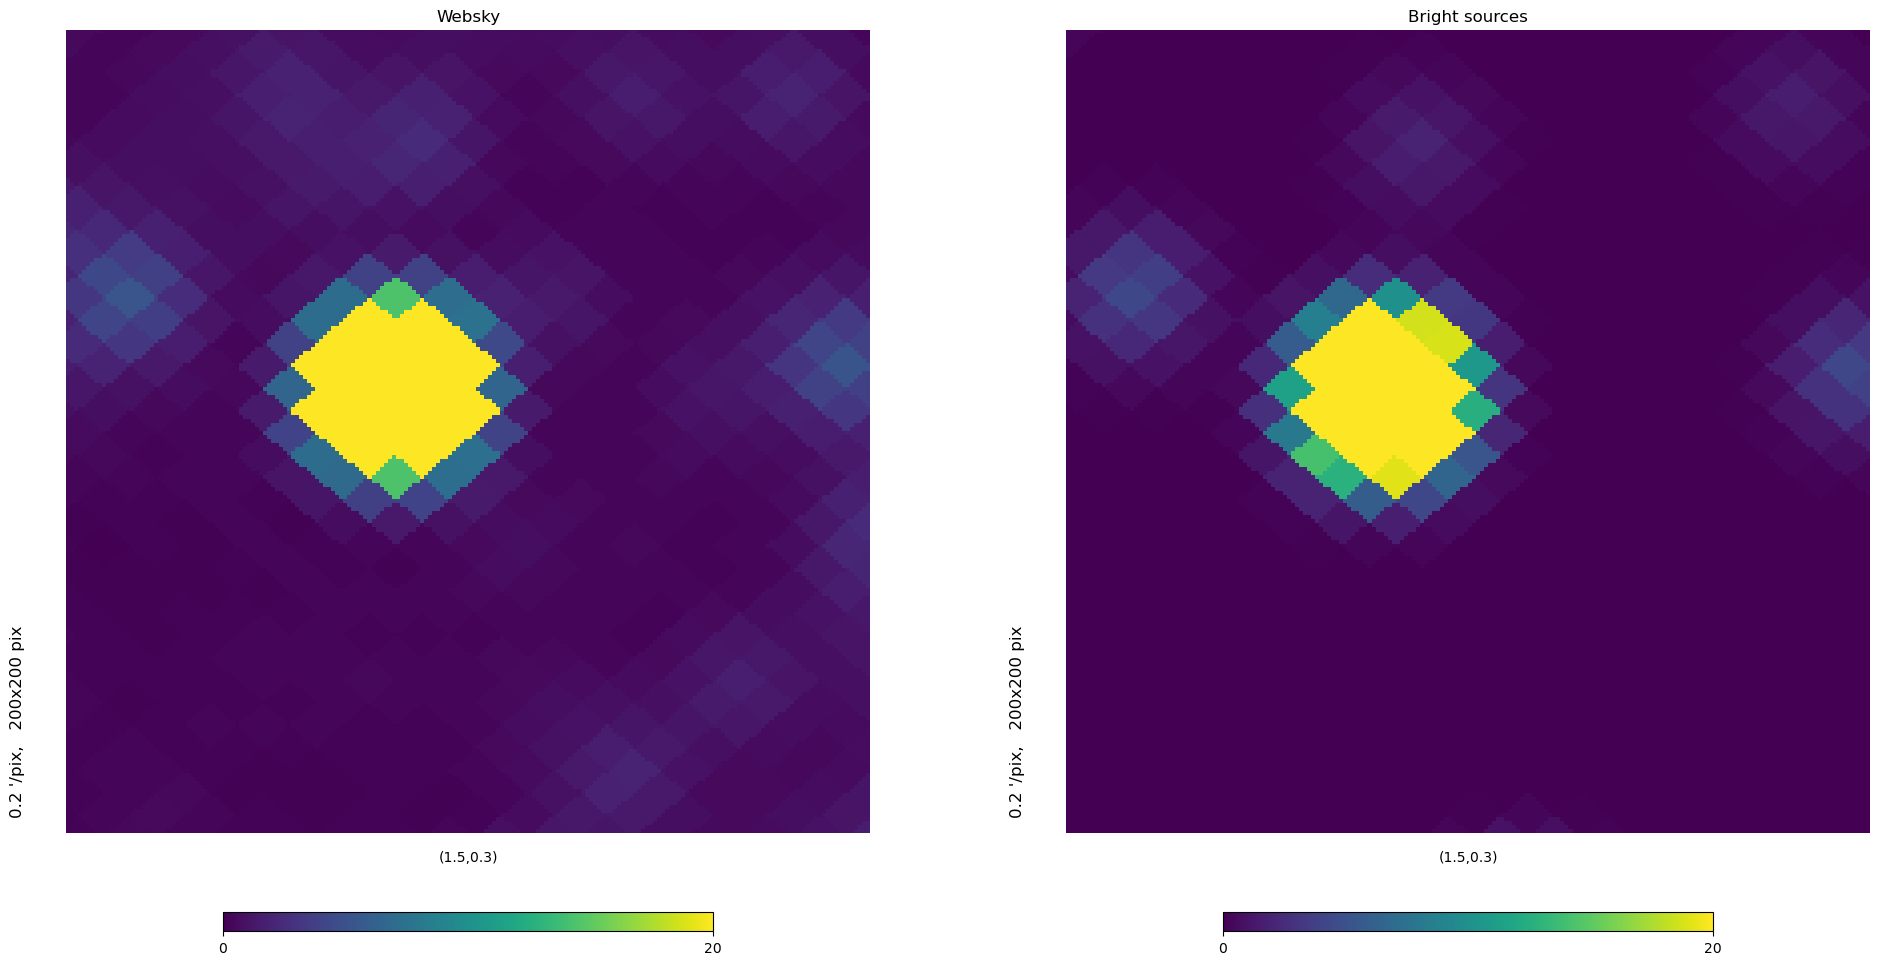

In [15]:
fig = plt.figure(figsize=(20,10))
hp.gnomview(websky[0], rot=(1.5, .3), reso=.2, min=0, max=20, title="Websky", fig=fig, sub=121)
hp.gnomview(bright[0], rot=(1.5, .3), reso=.2, min=0, max=20, title="Bright sources", fig=fig, sub=122)

In [16]:
lon, lat = hp.pix2ang(nside, bright[0].argmax(), lonlat=True)

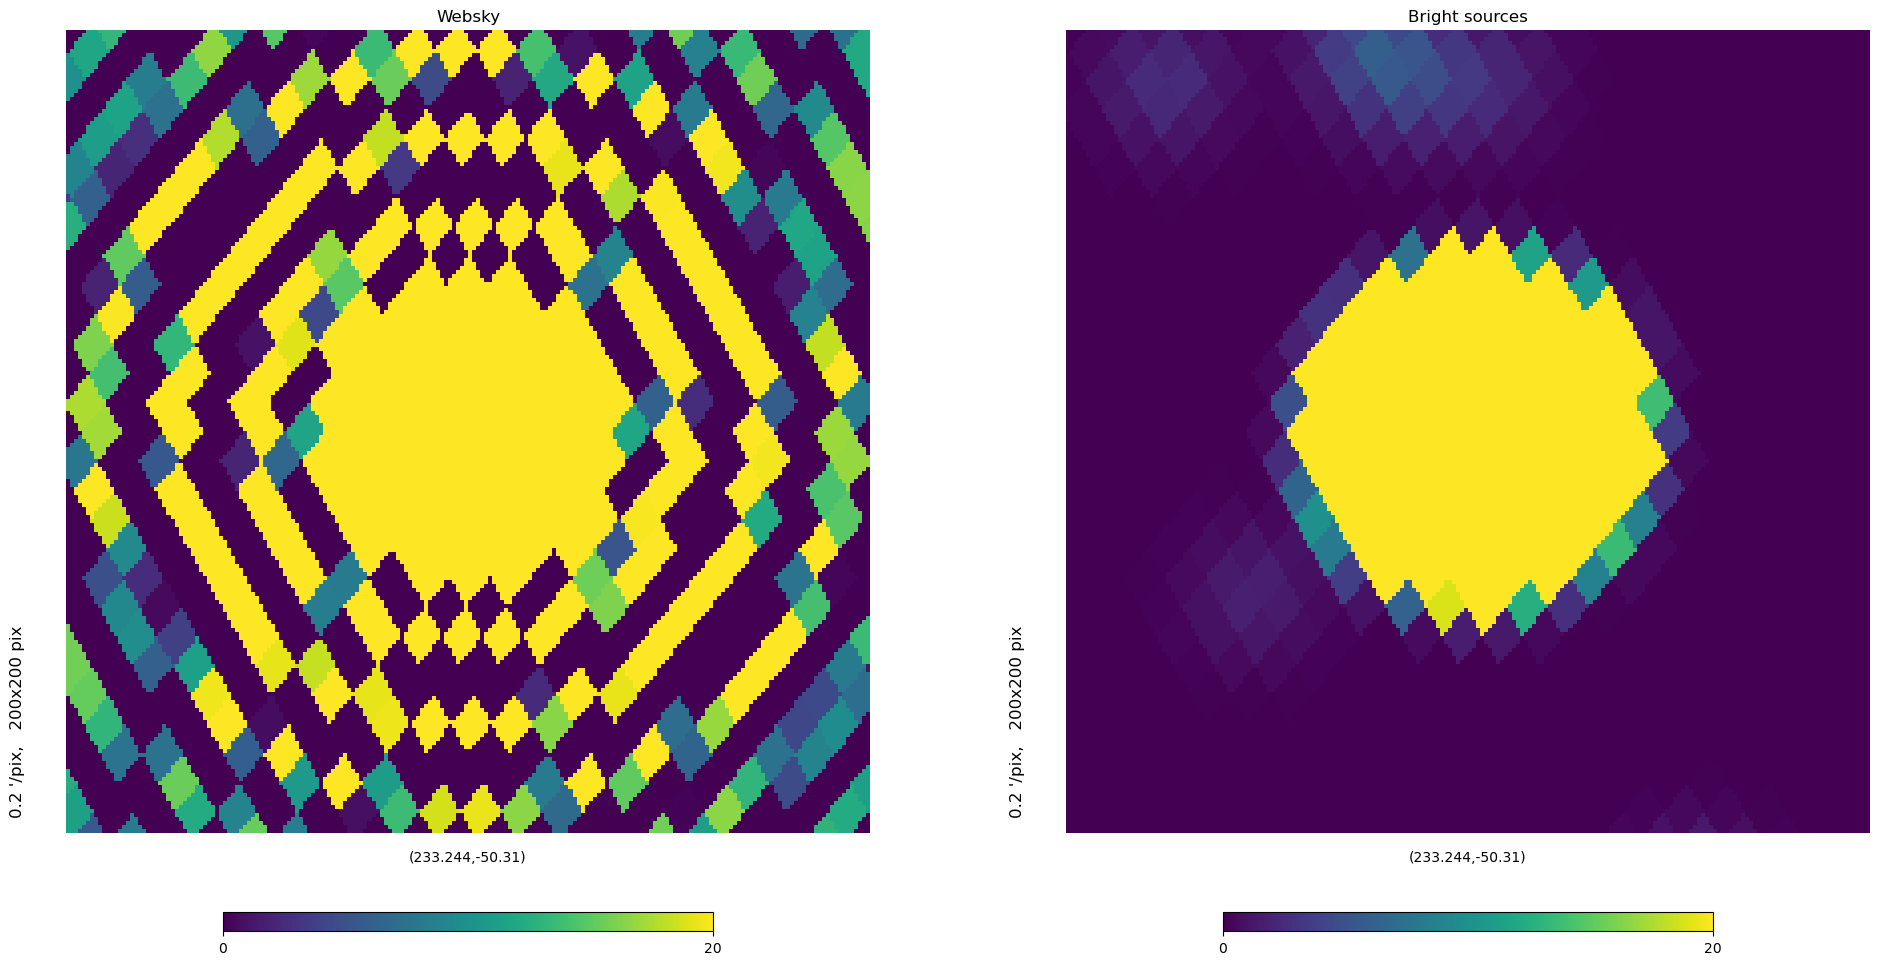

In [17]:
fig = plt.figure(figsize=(20,10))
hp.gnomview(websky[0], rot=(lon, lat), reso=.2, min=0, max=20, title="Websky", fig=fig, sub=121)
hp.gnomview(bright[0], rot=(lon, lat), reso=.2, min=0, max=20, title="Bright sources", fig=fig, sub=122)

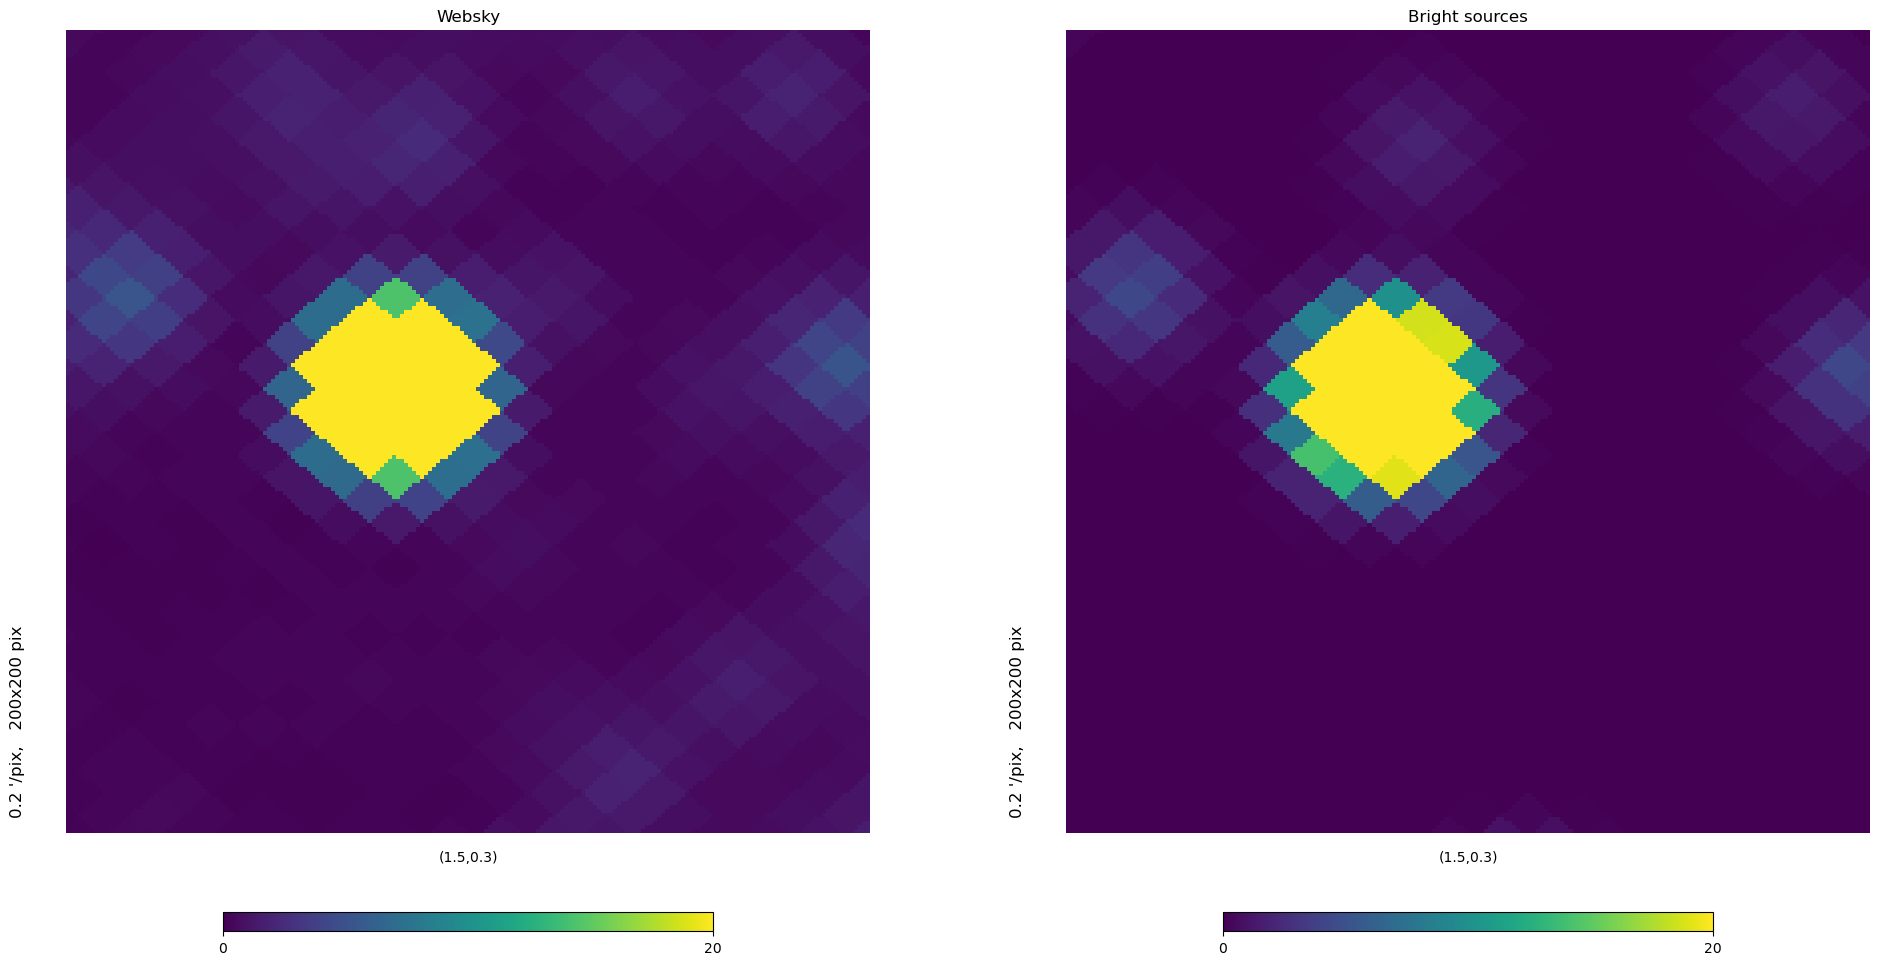

In [18]:
fig = plt.figure(figsize=(20,10))
hp.gnomview(websky[0], rot=(1.5, .3), reso=.2, min=0, max=20, title="Websky", fig=fig, sub=121)
hp.gnomview(bright[0], rot=(1.5, .3), reso=.2, min=0, max=20, title="Bright sources", fig=fig, sub=122)

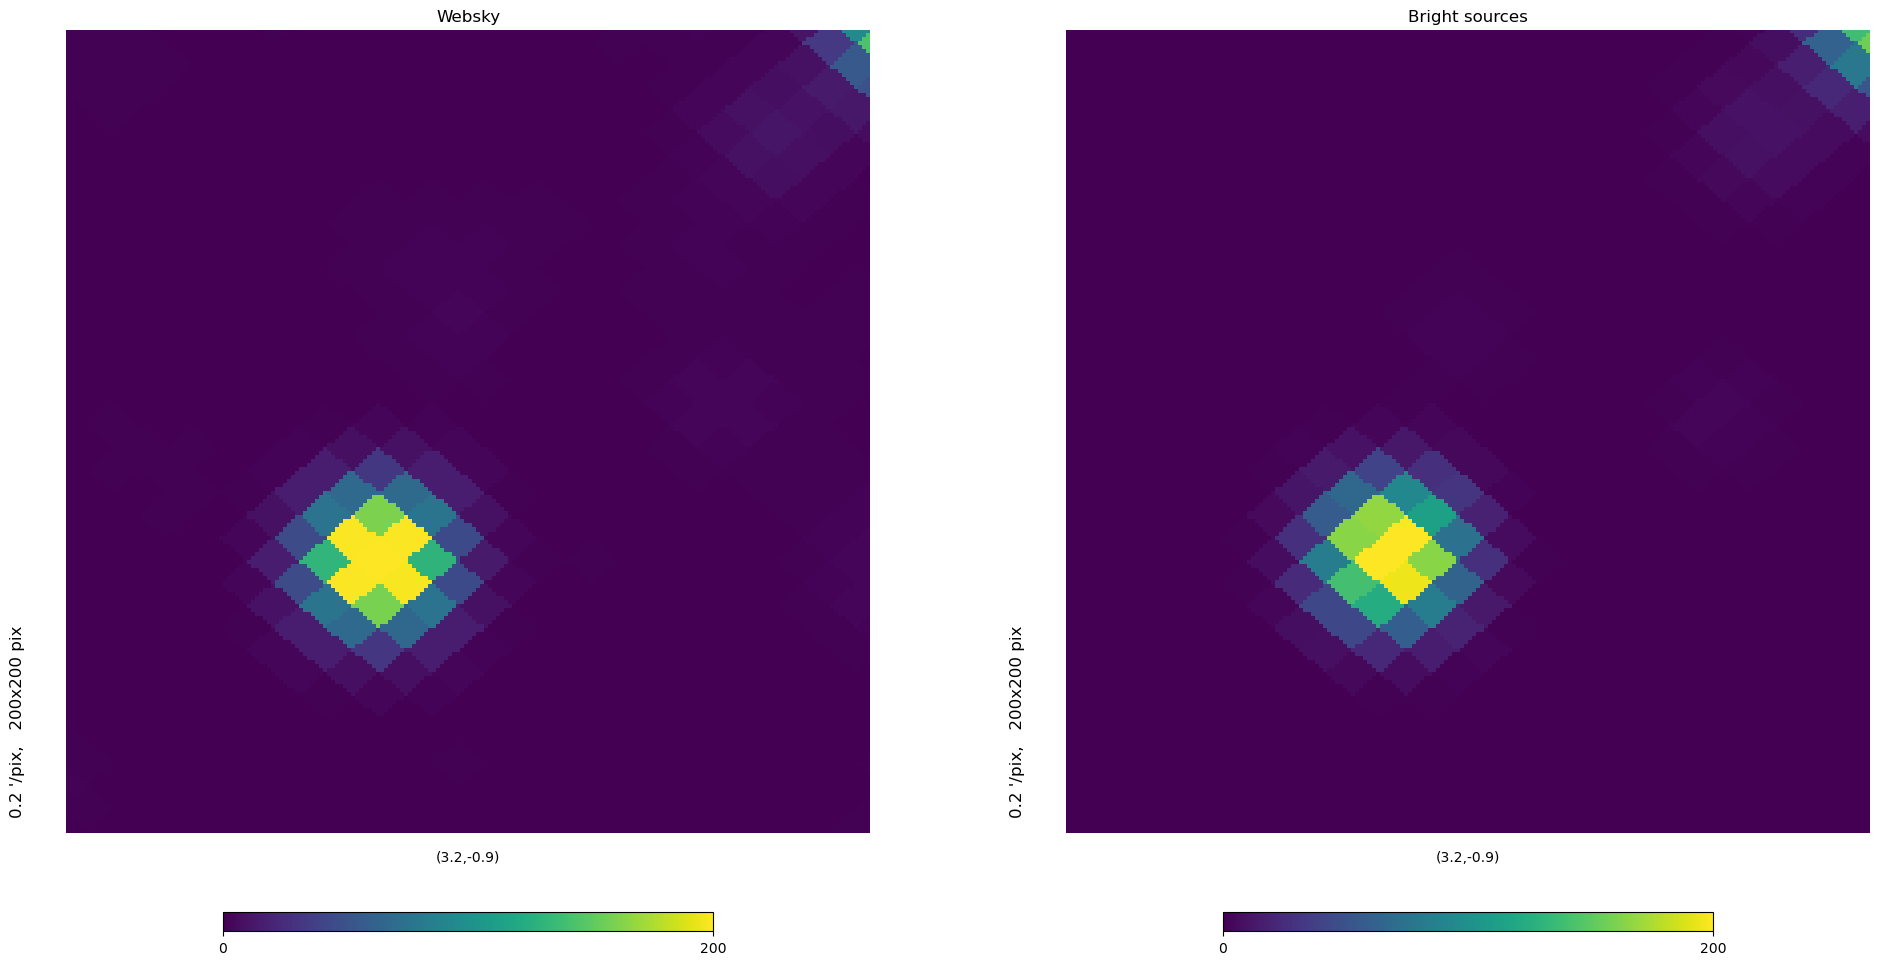

In [19]:
fig = plt.figure(figsize=(20,10))
hp.gnomview(websky[0], rot=(3.2, -.9), reso=.2, min=0, max=200, title="Websky", fig=fig, sub=121)
hp.gnomview(bright[0], rot=(3.2, -.9), reso=.2, min=0, max=200, title="Bright sources", fig=fig, sub=122)

In [20]:
from pathlib import Path
f = Path("/global/homes/z/zonca/prjcmb/www/pysm-data/websky/0.4/radio_catalog") / str(nside)

In [21]:
from pixell import enmap

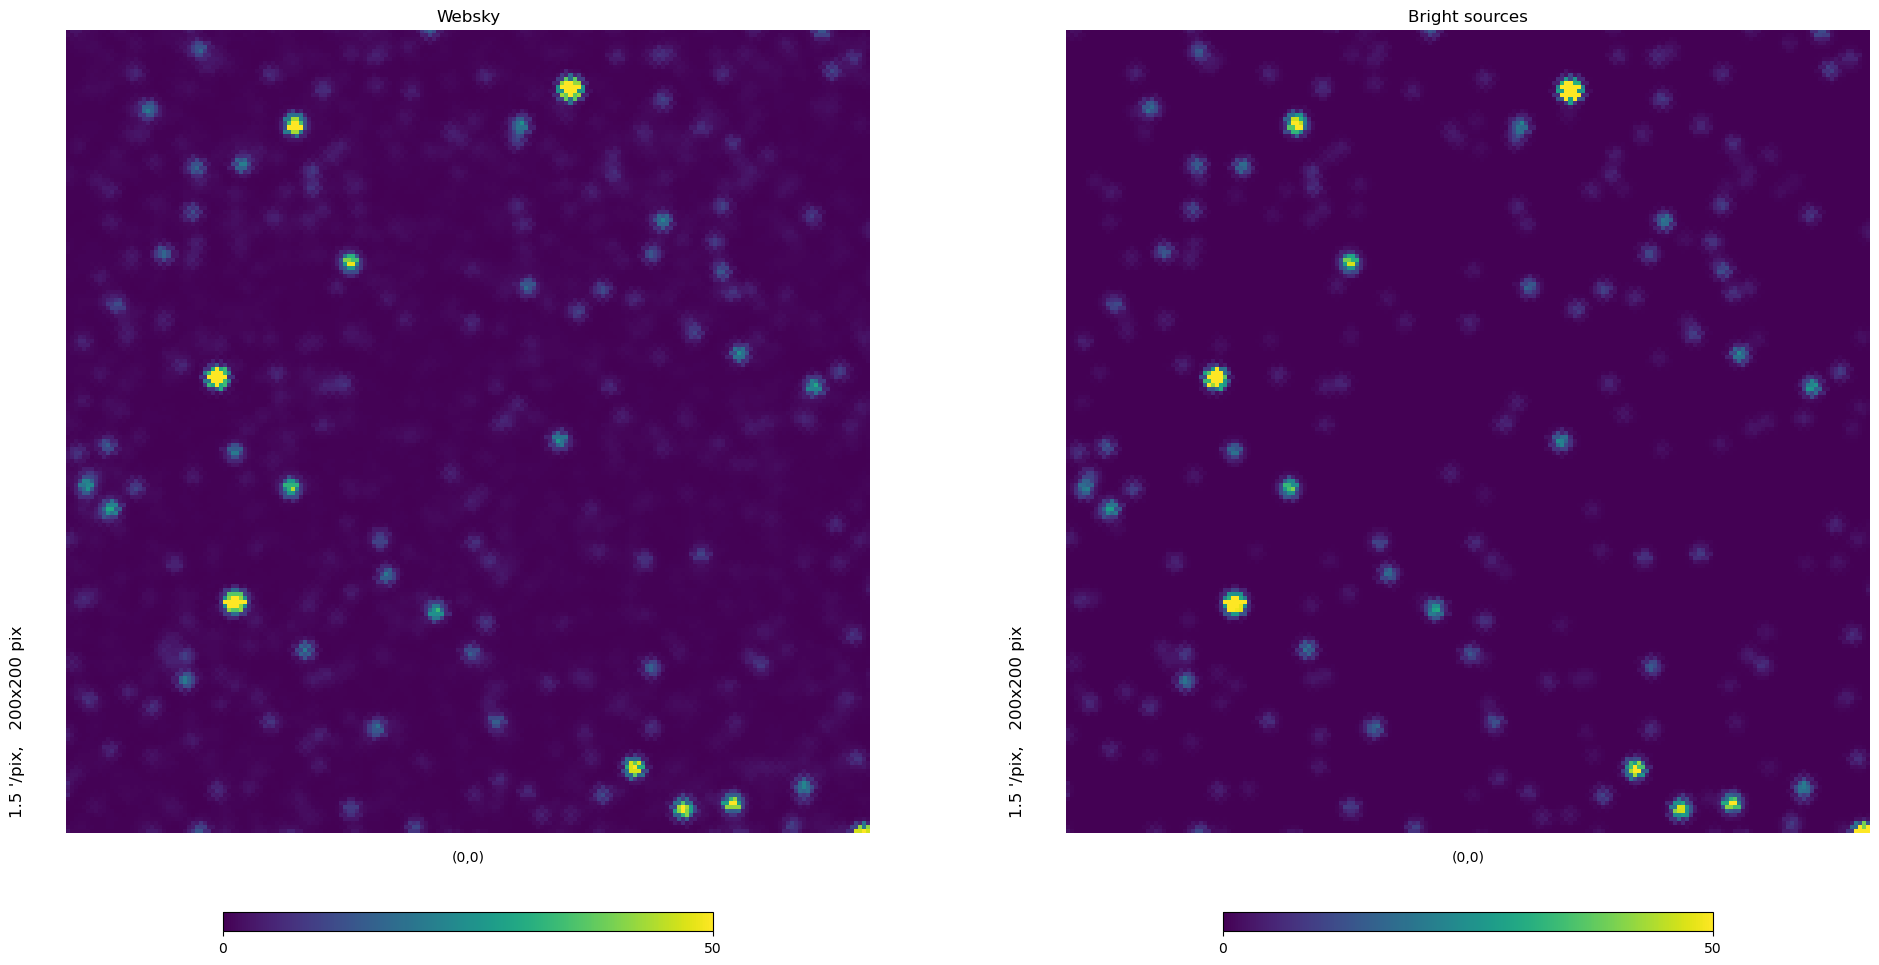

In [22]:
fig = plt.figure(figsize=(20,10))
hp.gnomview(websky[0], min=0, max=50, title="Websky", fig=fig, sub=121)
hp.gnomview(bright[0], min=0, max=50, title="Bright sources", fig=fig, sub=122)

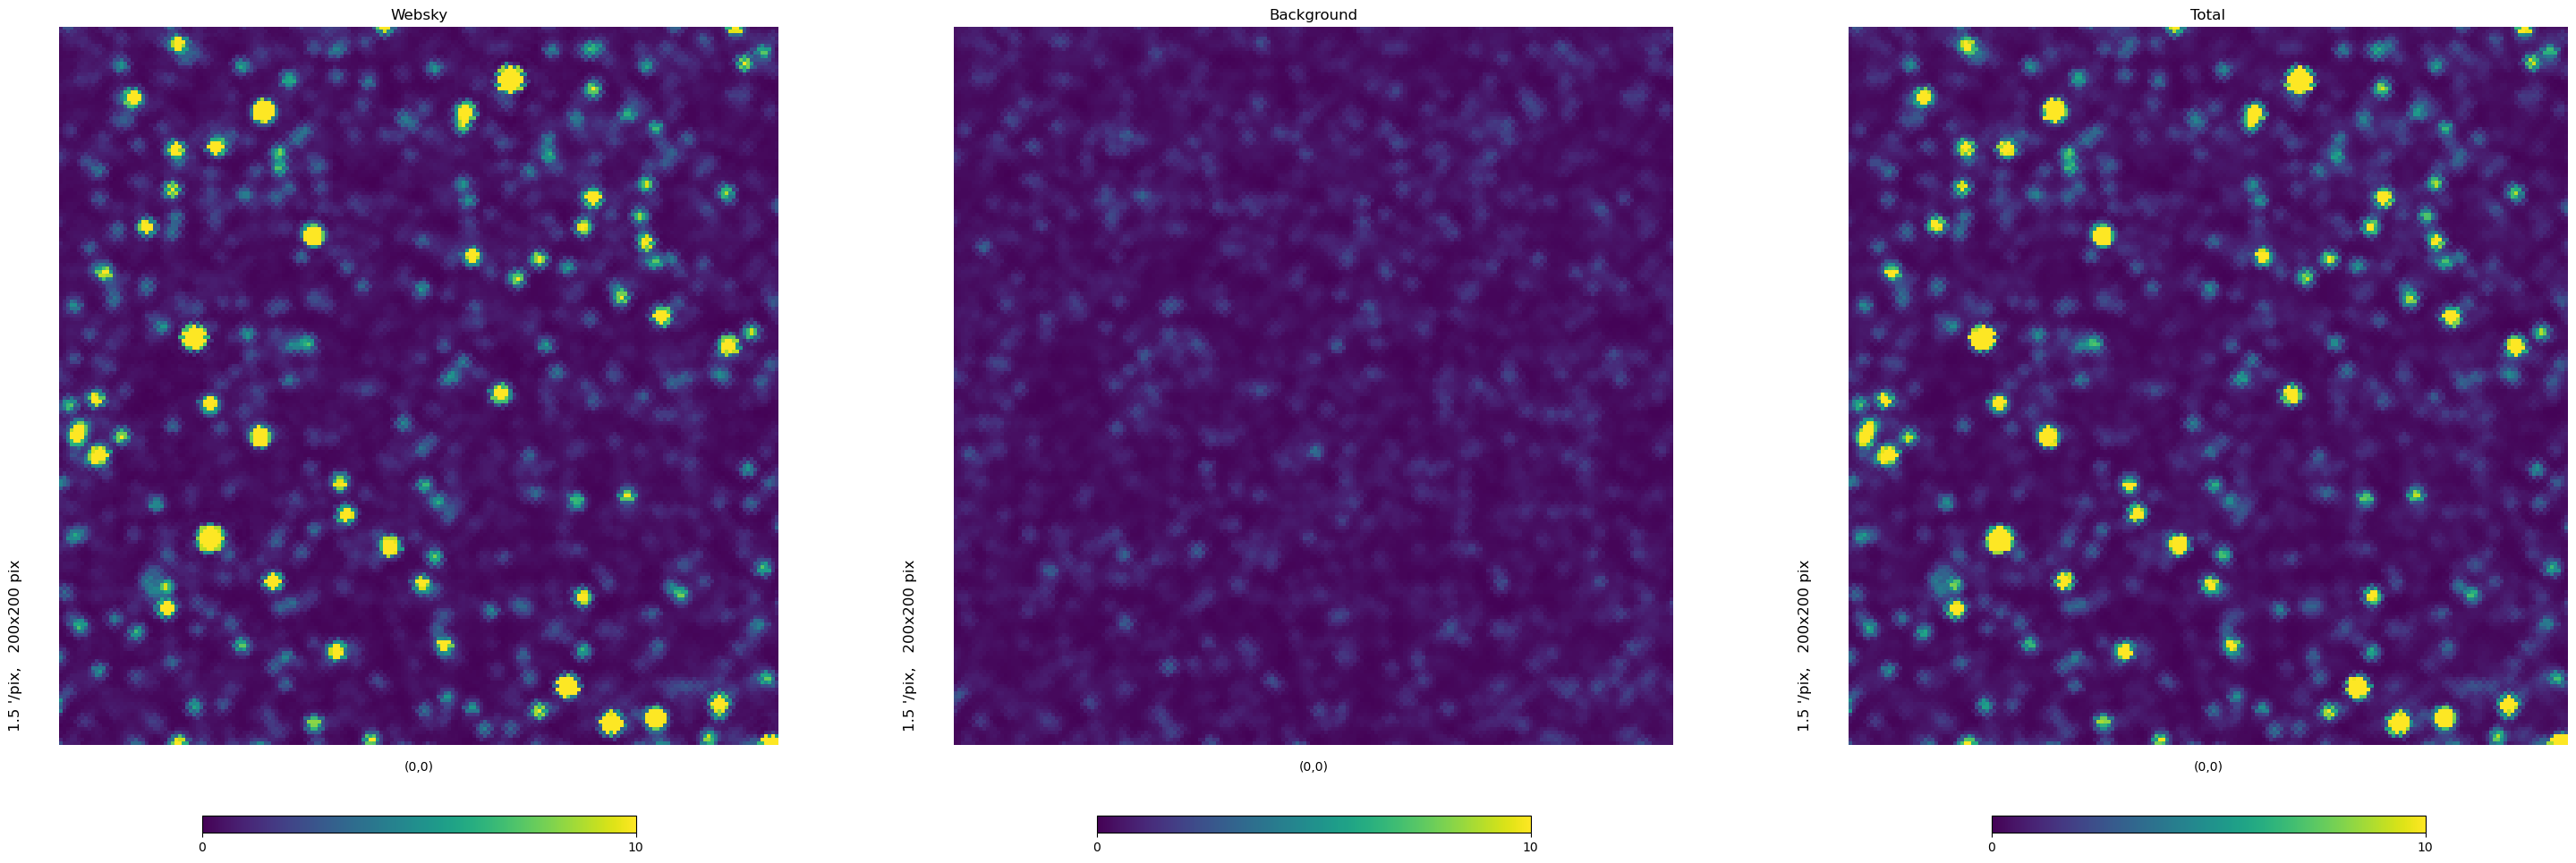

In [23]:
fig = plt.figure(figsize=(30,10))
hp.gnomview(websky[0], min=0, max=10, title="Websky", fig=fig, sub=131)
hp.gnomview(background[0], min=0, max=10, title="Background", fig=fig, sub=132)
hp.gnomview(bright[0]+background[0], min=0, max=10, title="Total", fig=fig, sub=133)

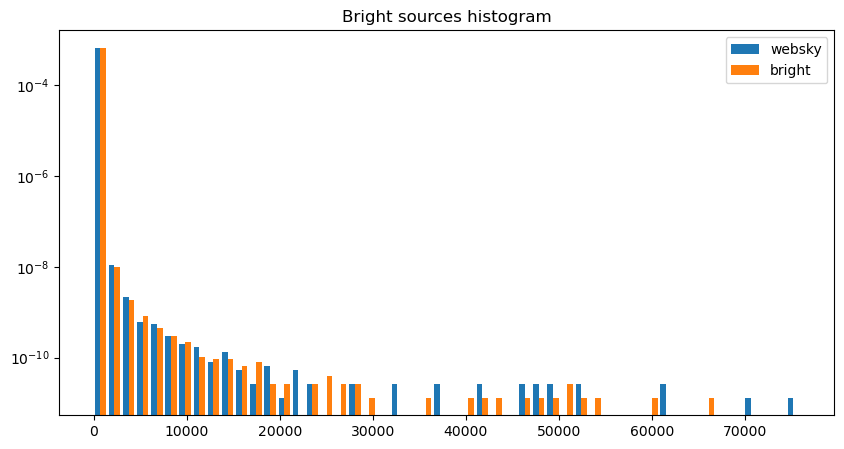

In [24]:
plt.figure(figsize=(10, 5))
plt.hist([websky[0].value, bright[0].value], density=True, bins=50, log=True,
         label=["websky", "bright"]);
plt.legend()
plt.title("Bright sources histogram");

In [25]:
bins = np.linspace(0, background.max().value, 50)

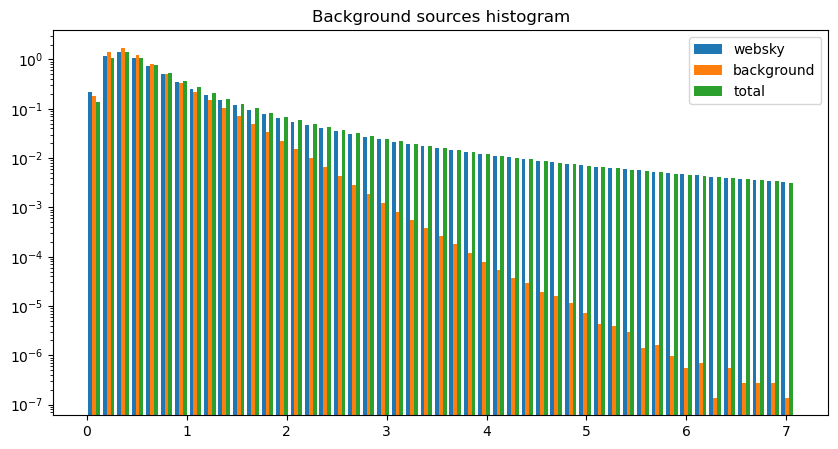

In [26]:
plt.figure(figsize=(10, 5))

plt.hist([websky[0].value, background[0].value, bright[0].value+background[0].value], density=True, bins=bins, log=True,
         label=["websky", "background", "total"]);
plt.legend()
plt.title("Background sources histogram");